<a href="https://colab.research.google.com/github/twisha-k/Python_notes/blob/main/128_coding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 128: ARIMA II - Stationarity in Time Series

---

#### Teacher-Student Activities

In the previous class, we touched upon the basics of time series forecasting and performed following two main steps of time series analysis:
1. Decomposing time series data to check the presence of trend, seasonality, and cyclical patterns.

2. Determining the stationary of the data using the following two commonly used techniques:
  - Rolling Statistics Test.
  - ADF (Augmented Dickey-Fuller ) Test.


The generic methodology for time series analysis is
summarised in the following flowchart:

<center><img src ="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/7ad05258-d59c-4d51-80c5-d101f29e9750.png"/>

`Fig: Generic methodology of time series analysis`
</center>

We had already explored steps 1 and 2 in the previous class. In today's class, we will cover steps 3 and 4 and set up a forecasting model. Let us first recall the concepts covered in the previous lesson and start this lesson from **Activity 1: Data Transformation to Achieve Stationarity**.

---

#### Recap

#### Understanding Time Series

**Forecasting** is predicting the future as accurately as possible, given all of the information available, including the historical data. Forecasting is needed in many situations, some of the examples are:  
-  Stocking an inventory requires forecasts of stock requirements.

  <img src ="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/7a89b44f-c117-4375-82e2-a344e0704057.png"/>
- Scheduling staff in a call centre next week requires forecasts of call volumes.

  <img src = "https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/f5bbed13-1f8c-4c62-a5e8-be5d4320adbe.png"/>

- Forecasting the closing price of a stock each day.

  <img src="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/6650a736-510a-4f70-bd4f-75774aca9140.png"/>

There is a wide range of forecasting methods, each developed
for specific purposes. However, we will concentrate only on forecasting future data concerning **time series** domain.

**Time Series:**

- Anything that is observed sequentially over time is a **time series**.
-  It is a set of observations taken at particular time intervals (usually equal intervals).
- In time series, we have only 2 variables, **time** and the variable we want to forecast. Thus, in a time series plot, we have "time" on $x$-axis and the magnitude of the data to be forecasted on $y$-axis as shown in the image given below:

<center>
  <img src="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/b66936b3-ef15-4584-b89c-e2544417d9e2.png"/>

  `Fig: Global average temperature change over years`
</center>

- The current time is defined as $t$ and an observation at the current time is defined as $y_t$.  The previous time is $(t-1)$ and before that the time  is $(t-2)$. The observations at these times are $y_{t-1}$ and $y_{t-2}$ respectively.
- Times in the future are what we are interested in forecasting. For example the next time is $(t+1)$ and after that the time is $(t+2)$. The observations at these times are $y_{t+ 1}$ and $y_{t+ 2}$ respectively.

- Examples of time series data include:
  - Daily IBM stock prices
  - Monthly rainfall
  - Quarterly sales results for Amazon
  - Annual Google profits

**Lags:**

- When you work with time series, you will be often interested in the observations made at prior times, called **lag times** or **lags**.
- A **lag** can be seen as the time difference between two points.
- In the case of daily data, $y_t$ is the current  value of a time series, while $y_{t-1}$ (or lag 1) is the value from yesterday and $y_{t-2}$ (or lag 2) is the observation that was made the day before yesterday and so on.


**Time Series Forecasting** is the process of using a statistical model to predict future values of a time series based on past results. But, *why do we need Time Series Forecasting models when we  already have other prediction models*? 🤔  Let us try to understand this with a simple example.

**Why Time Series Forecasting?**

Suppose you own a footwear store.


<img src = "https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/5f08864a-f95b-4ffd-8473-d762780363b5.jpg"/>

To determine how many pair of shoes you sell every month, you just add up the sales of every month. But, *what if you want to predict what will be the sales in the next month or next year*?

In this case, you have only one variable i.e. "sales" and you need to predict that variable in accordance with **time**.

A natural question is: How can we have predict sales with respect to time?🤔

The sale of shoes depends on a lot of factors. Some of them may be:

1. The demand of party wear shoes is at its peak during marriage season, christmas and other major events of the year.

2. Kids school shoes are in heavy demand when new session of school starts.

3. Generally people use different shoes based on various seasons.

In all above factors, time is common. These all are time-based events which repeats themselves in particular months. The time series forecasting algorithms takes care of these repetetive cycles and predicts the variables accordingly.

Hence, in cases where time is the only feature variable used to predict the other variable, we need time series forecasting.

Some other use cases are:
- Forecasting the birth rate at all hospitals in a city each year.
- Forecasting the number of passengers through a train station each day.
- Forecasting unemployment for a state each quarter.



Let us now perform time series forecasting on a dummy dataset and thereafter, we will come back to solve the above problem statement.




---

####  Data Preparation

Let us create a dummy dataset consisting of following two columns `Month` from the year `1989` to `2000` and `Sales` with random integers between `100` and `1000`. Set the `Month` as index with the new DataFrame and plot a time-series graph

In [ ]:
# Generate random time series data

# Import the Python modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

np.random.seed(2) # Use 'seed()' to generate same random integers on every execution of code.
time = pd.date_range(start = '1/1/1989', end = '31/12/2000', freq= 'M')
values = np.random.randint(100, 1000, len(time))

dummy_df = pd.DataFrame({'Month': time, 'Sales': values})
dummy_df.head()

,Month,Sales
0,1989-01-31,268
1,1989-02-28,627
2,1989-03-31,593
3,1989-04-30,684
4,1989-05-31,634


In [ ]:
# Get the total number of rows and columns and data types of columns.
dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Month   144 non-null    datetime64[ns]
 1   Sales   144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [ ]:
# Use 'Month' column as an index
dummy_in_df = dummy_df.set_index('Month')
dummy_in_df.head()

,Sales
Month,
1989-01-31,268
1989-02-28,627
1989-03-31,593
1989-04-30,684
1989-05-31,634


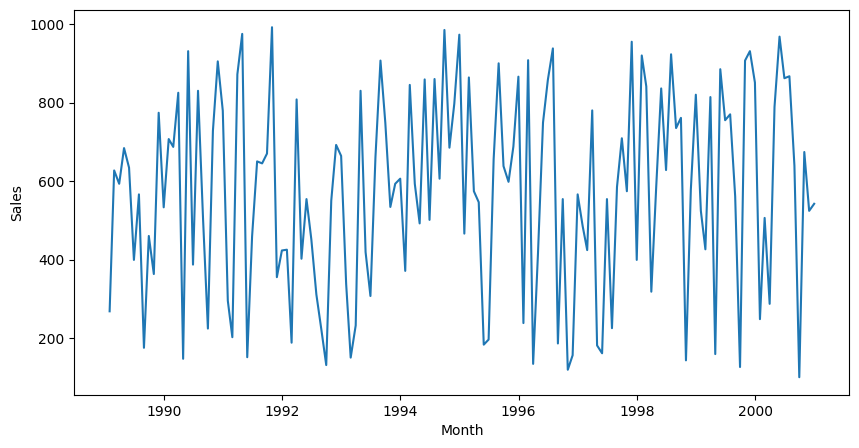

In [ ]:
# Visualise time-series plot.
plt.figure(figsize = (10, 5))
plt.xlabel('Month')
plt.ylabel('Sales')
plt.plot(dummy_in_df)
plt.show()

---

#### Decomposing Time Series Data

The components, by which a time series is composed, are called the **components** of time series data.  There are four basic components of the time series data described below. However, not every time series data is composed of all these four components.

**1. Trend:**  

- The Trend shows the variation of data with time.
- Using a Trend, you can see how your data increases or decreases over time.
- A positive or **upward** trend increases with time, whereas a negative or **downward** trend decreases with time, as shown in image below:

  <center><img src="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/24a04f4b-44b7-4d76-8b8c-f88e65a69839.png"/>

  `Fig 2.1: Upward, downward and No trends` </center>

- The stock market fluctuations, population growth, production in a company are all examples of trends.
- Trend may happen for some time and then it disappears. It may or may not repeat.

**2. Seasonality:**
- Seasonality is used to find the variations which occur at regular intervals of time.
- A seasonal time series has patterns that repeat at regular intervals, for example high sales at every weekend as shown in image below:
  <center><img src="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/ff3ed7e4-1264-4143-8a74-73ebd4a5dc7a.PNG"/>

  `Fig 2.2: An example of a seasonal time series` </center>

- This is a repeating pattern within a fixed time period, while in trend this is not the case.

**3. Irregularity:**

- These are erratic or unsystematic in nature and are also known as residual or noise.
- These variations are purely random and usually caused by unforeseeable circumstances, such as a sudden decrease in population because of a natural calamity.
- An example of irregular variation is shown in the image below:
  <center><img src="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/480f84f2-be00-4e20-946d-09c2dcc04810.jpg"/>

  `Fig 2.3: An example of irregular variations` </center>

**4. Cyclic:**

- A cycle refers to the period of ups and downs of a time series, mostly observed in business cycles.
- They do not have a time period, they can happen anytime, may be in 2 years, 4 years or even in 6 months.
- These trends are similar to seasonality. However, a seasonal time series have patterns that occur at fixed time period. Whereas a cyclic pattern are not of fixed time period.
  <center><img src="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/e6662ca3-3ca6-42de-9f77-a6cb6232468d.PNG"/>

  `Fig 2.4:  An example of cyclic variations` </center>





Some of the above components may or may not exist. For example, a time series may or may not have a trend. These components can be combined either  additively or multiplicatively.

**Additive Model:**  

An additive model suggests that the components are added together as follows:

\begin{align}
Y(t) = T(t) + C(t) + S(t) + R(t)
\tag{2.1}
\end{align}

Here, $T(t)$ , $C(t)$ , $S(t)$  and $R(t)$ represents the values of the trend, cyclic, seasonal, and random fluctuations (residuals) respectively at time $t$ .

**Multiplicative Model:**

A multiplicative model suggests that the components are multiplied together as follows:

\begin{align}
Y(t) = T(t) \times C(t) \times S(t) \times R(t)
\tag{2.2}
\end{align}

As can be seen from Equations (2.1) and (2.2), time-series data can be represented either in terms of addition or multiplication of trend,
seasonality, cyclical, and random fluctuations.

**When to use additive or multiplicative model?**
- The additive model works with linear type of time-series data i.e. changes that occur constantly over time.
- The multiplicative model works with a nonlinear type of data such as quadratic or exponential.
- The additive model is useful when the seasonal variation is relatively constant over time, whereas the multiplicative model is useful when the seasonal variation increases over time.



For simplicity reasons, we will join the cycle component into the trend, and rewrite the series components notation for additive structure as:

\begin{align}
Y(t) = T(t) + S(t) + R(t)
\tag{2.3}
\end{align}

And for multiplicative structure:

\begin{align}
Y(t) = T(t)  \times S(t) \times R(t)
\tag{2.4}
\end{align}

Let us now check the Python code to display the additive and multiplicative models of a time series dataset.

**Time Series Decomposition using Python:**

The `statsmodels` library provides an implementation of automatic time series decomposition using a function called `seasonal_decompose()`. It requires you to specify whether the model is additive or multiplicative.

The `seasonal_decompose()` function returns a result object. The result object contains arrays to access following four pieces of data from the decomposition:
1. Original or observed data.
2. Trend component.
3. Seasonal component.
4. Residual component.

Let us first perform additive decomposition of our dataset using the steps given below:            
1. Import `seasonal_decompose()` function from `statsmodels.tsa.seasonal` class.
2. Call `seasonal_decompose()` function and pass the indexed DataFrame and `model = 'additive'` as inputs to this function. Store the returned object in a variable, say `additive_result`.
3. Call the `plot()` function using `additive_result` object and display the plots.



 Additive Time Series Decomposition


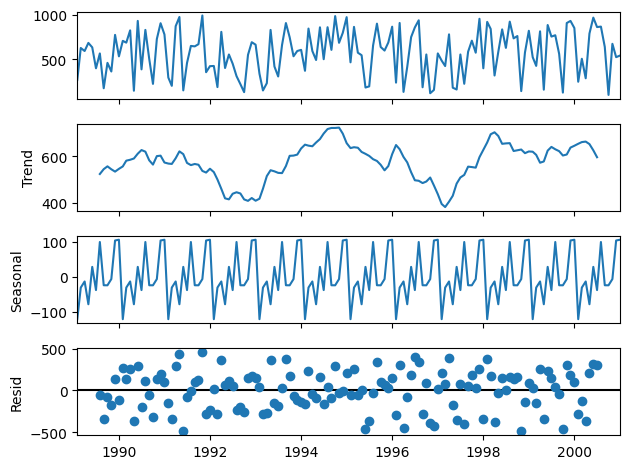

In [ ]:
# Perform additive seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
print("\n Additive Time Series Decomposition")
additive_result = seasonal_decompose(dummy_in_df, model = 'additive')
fig = additive_result.plot()
plt.show()

Hence, the `additive_result` object provides access to the trend and seasonal series as arrays. It also provides access to the residuals, which are the time series after the trend, and seasonal components are removed.

Let us now perform multiplicative decomposition of our dataset using the similar steps followed for additive model.        



 Multiplicative Time Series Decomposition


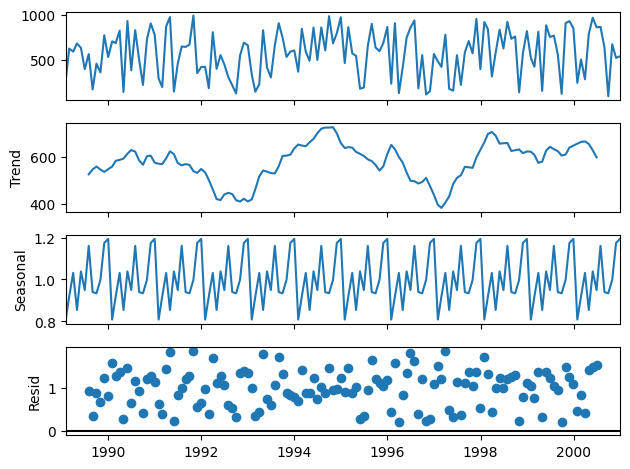

In [ ]:
# Perform multiplicative seasonal decomposition
print("\n Multiplicative Time Series Decomposition")
multip_result = seasonal_decompose(dummy_in_df, model = 'multiplicative')
fig = multip_result.plot()
plt.show()

---

#### Checking Stationarity

Before performing any time-series analysis, we need to check whether our time-series data is stationary or not  as the time series forecasting models assume that the data is stationary.

**What is stationarity?**
- By stationarity, we mean that the given dataset should have a (approximately) constant mean and variance over the given time period.
- Time series are stationary if they do not have trend or seasonal effects.
- Time series are non-stationary if they have trend or seasonal effects.

Refer the image below to understand how stationary and non-stationary time series data looks like:    

<center>
<img src="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/46b8faad-c2b6-4b23-b167-46d6ef4fcd0e.png"/>

`Fig 3.1: Example of Stationary and Non-Stationary time series`
</center>

- The left-hand side plot is an example of stationary time series as it appears to have constant mean and variance throughout the time.
- The right-hand side plot is an example of non-stationary time series as the mean and variance is increasing with time. Also, it clearly shows trend and seasonality.

Let us again create a line plot for our time series data.

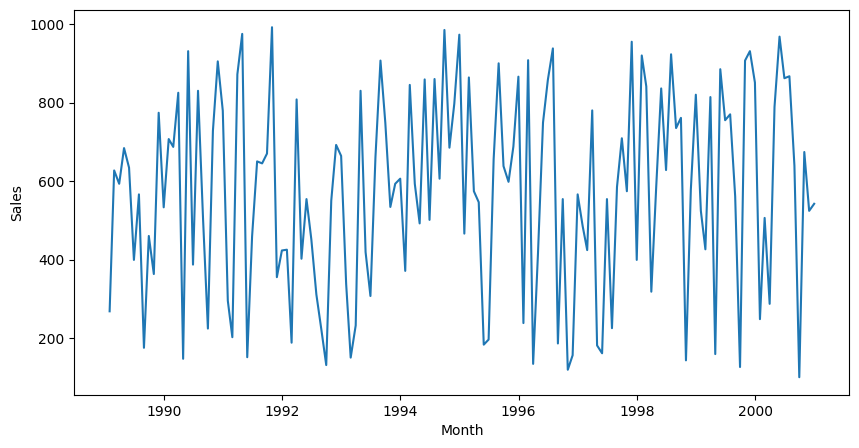

In [ ]:
# Visualise time-series plot.
plt.figure(figsize = (10, 5))
plt.xlabel('Month')
plt.ylabel('Sales')
plt.plot(dummy_in_df)
plt.show()

By looking at the plot, we can say that the mean and variance of the above data may or may not be constant.  Let us confirm whether the dataset is stationary or not by using following two widely used techniques:

1. Rolling Statistics Test
2. ADF (Augmented Dickey-Fuller ) Test



**1. Rolling Statistics Test**

A rolling analysis of a time series model is often used to assess the model's stability over time.
Rolling means creating a rolling window with a specified size and performing calculations on the data in this window which, of course, rolls through the data. The figure below explains the concept of rolling.

<center>
<img src="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/79c49444-a6b8-48a5-8aef-789f9d7a5eb5.jpg"/>

`Fig 3.1: Rolling window of size 3`
</center>

In the above example, for a rolling window of size 3, a function like mean, median, standard deviation etc. is calculated repeatedly over every data point.

Let us assume a window size of 12 considering that our dataset has month-wise distribution of data.

Now, calculate rolling mean (aka moving average) and rolling standard deviation (aka moving standard deviation) by using `rolling().mean()` and `rolling().std()` functions of pandas DataFrame. The syntax for doing this is:                
- `DataFrame.rolling(window = 12).mean()`
- `DataFrame.rolling(window = 12).std()`



In [ ]:
# Determine rolling statistics
roll_mean = dummy_in_df.rolling(window = 12).mean() # gives rolling mean at yearly level
roll_std = dummy_in_df.rolling(window = 12).std()   # gives rolling std at yearly level

print('Rolling Mean')
print(roll_mean.head(20))
print('-----------------------------')
print('Rolling Standard Deviation')
print(roll_std.head(20))

Rolling Mean
                 Sales
Month                 
1989-01-31         NaN
1989-02-28         NaN
1989-03-31         NaN
1989-04-30         NaN
1989-05-31         NaN
1989-06-30         NaN
1989-07-31         NaN
1989-08-31         NaN
1989-09-30         NaN
1989-10-31         NaN
1989-11-30         NaN
1989-12-31  506.333333
1990-01-31  542.916667
1990-02-28  547.916667
1990-03-31  567.250000
1990-04-30  522.500000
1990-05-31  547.250000
1990-06-30  546.250000
1990-07-31  568.250000
1990-08-31  595.666667
-----------------------------
Rolling Standard Deviation
                 Sales
Month                 
1989-01-31         NaN
1989-02-28         NaN
1989-03-31         NaN
1989-04-30         NaN
1989-05-31         NaN
1989-06-30         NaN
1989-07-31         NaN
1989-08-31         NaN
1989-09-30         NaN
1989-10-31         NaN
1989-11-30         NaN
1989-12-31  177.520464
1990-01-31  168.968237
1990-02-28  172.532715
1990-03-31  190.143546
1990-04-30  220.876148
1990-05-31

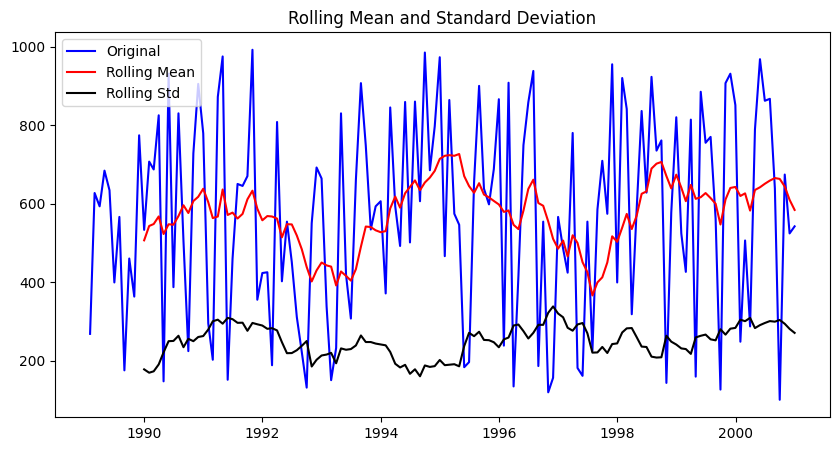

In [ ]:
# Plot the rolling statistics
plt.figure(figsize = (10, 5))
plt.plot(dummy_in_df, color = 'blue', label = 'Original')
plt.plot(roll_mean, color = 'red', label ='Rolling Mean')
plt.plot(roll_std, color = 'black', label ='Rolling Std')
plt.legend()
plt.title('Rolling Mean and Standard Deviation')
plt.show()

In [ ]:
# Perform ADF test
from statsmodels.tsa.stattools import adfuller
dummy_adf = adfuller(dummy_in_df['Sales'])
dummy_adf

(-11.637607999397016,
 2.185645554770695e-21,
 0,
 143,
 {'1%': -3.4769274060112707,
  '5%': -2.8819726324025625,
  '10%': -2.577665408088415},
 1804.517270990578)

In [ ]:
# Print each element of tuple returned by 'adfuller()' function.
# Print 'ADF Statistic' using 0-th index of ADF Test Vatiable
print('ADF Statistic:', dummy_adf[0])

# Print 'p-value' using 1-st element index of ADF Test Variable
print('p-value: ', dummy_adf[1])

# Print Critical Values by iterating over 4-th index of ADF Test Variable
# Create a for loop for 4-th index items and store them in key, value
print('Critical Values:')
for key, value in dummy_adf[4].items():
	print(key,":", value)

ADF Statistic: -11.637607999397016
p-value:  2.185645554770695e-21
Critical Values:
1% : -3.4769274060112707
5% : -2.8819726324025625
10% : -2.577665408088415


Hence, from the above ADF test result, we can see that p-value  is very small.  Hence, we can conclude that although the critical values are not at all close to the test statistics, our time series data at the moment looks **Stationary**.

However, with real world dataset, this may not be the case. You may get a very high p-value indicating that the time series data is not stationary. Such data is not suitable for time-series modelling.
Hence, we need to apply certain transformations to our data to make it stationary. This is similar to the feature engineering process usually done in supervised learning.

Now that we have understood how to determine whether the time series data is stationary or not. Let us learn how to stationarise a non-stationary dataset.

---

#### Activity 1: Data Transformation to Achieve Stationarity

Generating stationary data is important for enhancing the time series forecasting model. In the previous class, we already determined that our dummy dataset is stationary. Hence, data transformation is not needed in such case.

However, most of the time series data possess trends and seasonality which affect the value of the time series at different times. Thus, we may need to apply various data transformation techniques in order to stationarise the data. Some of the commonly used data transformation techniques to achieve stationarity are as shown in the image below:

<center><img src ="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/31d9095e-426d-484c-bed1-b4bb365e992d.png"/></center>

Apart from these techniques, we can also apply other transformations like taking square, square root, cube, cube root etc. However, these techniques might be needed only when log transformation or differencing is not giving the desired result.





##### **Log Transformation:**

Converting time series data to a logarithmic scale reduces the variability of the data. Let us transform our dummy data to logarithmic scale using `log()` function of the `numpy` module.

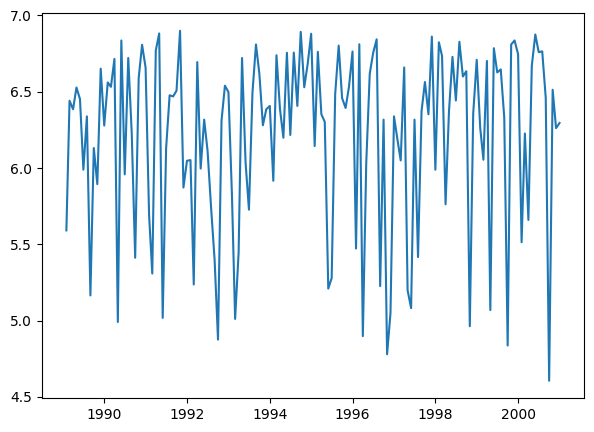

In [ ]:
# S1.1: Perform log transformation of dataset and plot the transformed data.
plt.figure(figsize=(7,5))
dummy_log=np.log(dummy_in_df)
plt.plot(dummy_log)
plt.show()

You can observe that the numbers on y-axis has changed, as the scale itself has changed.

Let us check whether the log transformed data is stationary or not using Rolling Statistics and ADF (Augmented  Dickey–Fuller) test. However, you need to perform these two tests every time after performing data transformation to verify stationarity.

Thus, instead of again writing the code for Rolling Statistics and ADF test, let us create a user-defined `test_stationarity()` function that conducts both stationarity test for a time-series data using the steps given below:             
1. Create a `test_stationarity()` function which accepts a time series data as input.

2. Inside this function, determine the rolling mean and rolling standard deviation using the `rolling().mean()` and `rolling().std()` functions of pandas DataFrame. Also, create three different line plots to visualise the original data, rolling mean, and rolling standard deviation values.

3. Call the `adfuller()` of `statsmodels.tsa.stattools` module and pass the time series DataFrame as input to this function. Print the first, second, and last element of the tuple returned by this function.


In [ ]:
# T1.1: Create a custom function to check whether the data is stationary or not.

def test_stationarity(timeseries):

  # Determine rolling statistics
  mov_average = timeseries.rolling(window = 12).mean()
  mov_std = timeseries.rolling(window = 12).std()

  # Plot rolling statistics
  plt.figure(figsize=(7,5))
  plt.plot(timeseries, color='blue', label = 'Original')
  plt.plot(mov_average, color='red', label = 'Rolling Mean')
  plt.plot(mov_std, color='black', label = 'Rolling Std')
  plt.legend()
  plt.title("Rolling mean and std")
  plt.show()


  # Perform Dickey–Fuller test
  print('Results of Dickey Fuller Test:')
  dummy_adf = adfuller(timeseries['Sales'])
  print('ADF Statistic:', dummy_adf[0])
  print('p-value: ', dummy_adf[1])
  print('Critical Values:')
  for key, value in dummy_adf[4].items():
	  print(key,":", value)

Now, pass the log transformed time series data as input to the above function to verify whether the transformed data is stationary or not.

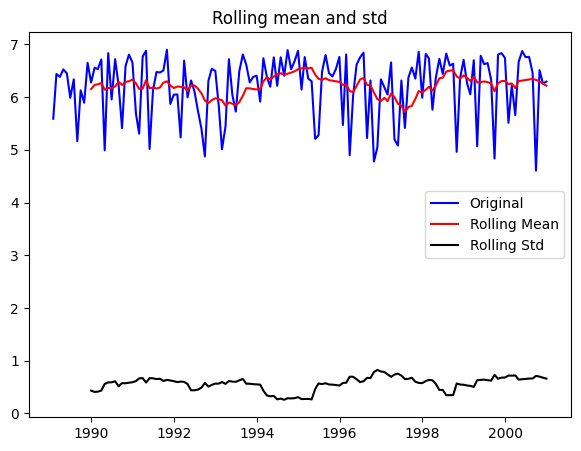

Results of Dickey Fuller Test:
ADF Statistic: -11.666756649335177
p-value:  1.87615339747297e-21
Critical Values:
1% : -3.4769274060112707
5% : -2.8819726324025625
10% : -2.577665408088415


In [ ]:
# S1.2: Check the stationarity of the log transformed data
test_stationarity(dummy_log)

You may observe that the rolling mean  and standard deviation plot appears more stationary for log transformed data. However, the results of ADF tests for log transformed data is same as that of original data.

As the p-value is much less than 0.05, the log transformed time series data appears stationary.

Let us look at the other data transformation techniques.



##### **Differencing:**

Differencing is basically substracting the previous value from the current value of your time series i.e.

$$y'_t = y_t - y_{t-1}$$ such that  $y'_t$ have constant mean and variance and hence can be treated as a stationary series.

Following are the different differencing techniques:           

**1. First-order differencing:**

It is the change between two consecutive observations in the time series and can be written as:

$$y'_t = y_t - y_{t-1}$$

The differenced series will have only $T-1$ values ($T$ is the total number of observations/rows), since it is not possible to calculate the difference $y'_t$ for the first observation. Taking the difference between consecutive observations is also called as **lag-1 difference.**

We can obtain previous time lag i.e. $y_{t-1}$ using the `shift(1)` function of pandas DataFrame. Here, `1` indicates previous time lag. Similarly, to obtain $y_{t-2}$, we can use `shift(2)` function.


Let us calculate the lag-1 difference $y'_t$ for our dummy DataFrame using the above formula.


In [ ]:
# T1.2: Perform first-order differencing
first_or_diff_df = dummy_in_df - dummy_in_df.shift(1)  # y′t = yt − yt−1
first_or_diff_df

,Sales
Month,
1989-01-31,NaN
1989-02-28,359.0
1989-03-31,-34.0
1989-04-30,91.0
1989-05-31,-50.0
...,...
2000-08-31,-228.0
2000-09-30,-539.0
2000-10-31,574.0


You can observe that the value for first observation is `NaN`. Here, the order of differencing is **`1`** as the original DataFrame is differenced only **once**.

Let us now test whether the data obtained after first order differencing is stationary or not by calling the `test_stationarity()` function. But before that, remove `NaN` values from the differenced DataFrame.

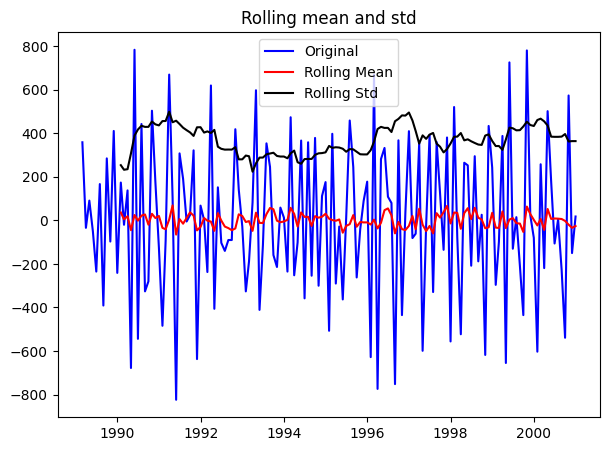

Results of Dickey Fuller Test:
ADF Statistic: -8.186201866299555
p-value:  7.887535475444414e-13
Critical Values:
1% : -3.4793722137854926
5% : -2.8830370378332995
10% : -2.578233635380623


In [ ]:
# S1.3: Remove NaN values and check stationarity of the time series data
first_or_diff_df.dropna(inplace=True)
test_stationarity(first_or_diff_df)

Hence, you may observe that we obtained a very less p-value and better ADF statistic value as compared to the previous results, thereby confirming that the first-order differenced data is definitely stationary.

However, sometimes first order differenced data may not appear stationary. In such cases, we may need to difference the data a second time to obtain a stationary series.

**2. Second-order differencing:**

It is simply differencing the first order differenced series and is also called as **lag-2 difference**. It can be written as:       

\begin{align}
y''_t &= y'_t - y'_{t-1} \\ &= (y_t - y_{t-1}) - (y_{t-1} - y_{t-2}) \\ &= y_t -2y_{t-1} + y_{t-2}
\end{align}

In this case, $y''_t$ will have only $T-2$ values ($T$ is the total number of observations in the original data).  

Let us calculate the lag-2 difference $y''_t$ for our dummy DataFrame by shifting the lag-1 differenced data.


In [ ]:
# S1.4: Perform second-order differencing.
sec_or_diff_df = first_or_diff_df - first_or_diff_df.shift(1)    # y''t = y't − y't−1
sec_or_diff_df

,Sales
Month,
1989-02-28,NaN
1989-03-31,-393.0
1989-04-30,125.0
1989-05-31,-141.0
1989-06-30,-185.0
...,...
2000-08-31,-233.0
2000-09-30,-311.0
2000-10-31,1113.0


Again, you can observe that the value for first observation is `NaN`. Here, the order of differencing is **`2`** as the original DataFrame is differenced **twice**.

Let us now test whether the data obtained after second order differencing is stationary or not by calling the `test_stationarity()` function. Before that, remove NaN values from the differenced DataFrame.

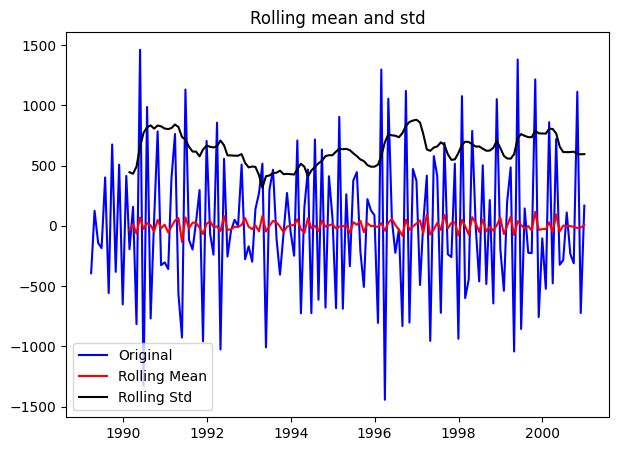

Results of Dickey Fuller Test:
ADF Statistic: -7.137412658516276
p-value:  3.392660170048569e-10
Critical Values:
1% : -3.482087964046026
5% : -2.8842185101614626
10% : -2.578864381347275


In [ ]:
# S1.4: Remove NaN values and check stationarity of the time series data
sec_or_diff_df.dropna(inplace=True)
test_stationarity(sec_or_diff_df)

Hence, you may observe that we obtained a very less p-value and better ADF statistic value as compared to the previous results, thereby confirming that the second-order differenced data is definitely stationary.

Similarly, you can continue differencing the time series data unless it is stationary. In practice, it is almost never necessary to go beyond second-order differences.

**3. Seasonal differencing:**

A seasonal difference is the difference between an observation and the previous observation from the same season. It can be written as:

$$y'_t = y_t - y_{t-m}$$ where $m$ is the number of seasons. These are also called **lag-$m$ differences**, as we subtract the observation after a lag of $m$ periods.

Thus, if $m=12$, the differences are taken between original observations that are a year apart from each
other (for example, lag value for Jan 1990 will be obtained by subtracting its value from Jan 1989).

Let us calculate lag-12 difference for our dummy DataFrame by using `shift(12)` function. Also print the first 20 values of the seasonal differenced DataFrame.

In [ ]:
# S1.5: Perform seasonal differencing.
seasonal_diff_df = dummy_in_df - dummy_in_df.shift(12)    # y''t = y't − y't−m
seasonal_diff_df.head(20)

,Sales
Month,
1989-01-31,NaN
1989-02-28,NaN
1989-03-31,NaN
1989-04-30,NaN
1989-05-31,NaN
1989-06-30,NaN
1989-07-31,NaN
1989-08-31,NaN
1989-09-30,NaN


You may observe that the seasonal differencing returned null values in its first 12 elements. The lag value at `1990-01-31` will be obtained by subtracting the original sales value of `1989-01-31` from `1990-01-31`.

Let us now test whether the data obtained after seasonal differencing is stationary or not by calling the `test_stationarity()` function. Before that, remove NaN values from the differenced DataFrame.



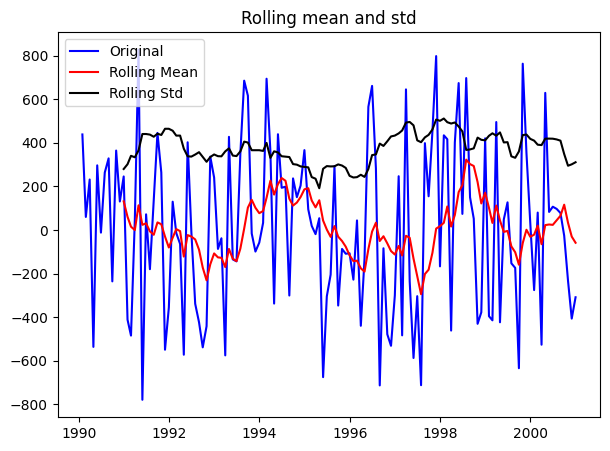

Results of Dickey Fuller Test:
ADF Statistic: -4.977422371115783
p-value:  2.4593498375518446e-05
Critical Values:
1% : -3.486055829282407
5% : -2.8859430324074076
10% : -2.5797850694444446


In [ ]:
# S1.6: Remove NaN values and check stationarity of the time series data
seasonal_diff_df.dropna(inplace=True)
test_stationarity(seasonal_diff_df)

The rolling mean plot does not appear to be stationary. However, we obtained a very less p-value and better ADF statistic value as compared to the previous results. Hence, we can say that the seasonal differenced data is definitely stationary.

🤚
**Note:** Perform log transformation or differencing only when your original time series data is not stationary. Our sales dummy dataset was already stationary, hence we will directly use the original time series dataset to set up the forecasting model.

Now that we have understood how to transform a non-stationary time series data into stationary, let us deploy a time-series forecasting model using ARIMA.



---

#### Activity 2: Deploying ARIMA Model

ARIMA (Auto Regressive Integrated Moving Average) is a combination of two models **AR (Auto Regressive)** and **MA (Moving Average)**.

It has 3 hyperparameters:
- **p** (auto regressive lags) which comes from AR component. This can be obtained from **PACF (partial autocorrelation function)** graph.
- **d** (order of differentiation) which is nothing but the order of differencing needed to transform non-stationary data into stationary.
- **q** (moving average) which comes from the MA component. This can be obtained from **ACF (autocorrelation function)** graph.

<center><img src ="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/76b1e3c5-4644-403b-954c-2edb85ee491a.PNG"/></center>


Confused? 🤔

💡 Don't worry, we will explore each of these terms  with sufficient details in the upcoming lessons. As of now, we will simply deploy the time series model using the `ARIMA()` implementation in `statsmodels` package.

Before that, let us create train and test sets, by splitting the time series into 2 contiguous parts in approximately 75:25 ratio or any reasonable proportion based on time frequency of series.

For now, split the dataset such that out of 144 months, last 12 months become the test set and the first 132 months becomes the train set.

**Note:** Do not take random samples for training data as the order sequence of the time series should be intact in order to use it for forecasting.

In [ ]:
# S2.1: Split the time series data into train and test sets.
train = dummy_in_df.iloc[:len(dummy_in_df) - 12]
test = dummy_in_df.iloc[len(dummy_in_df) - 12 :]
print(train.shape)
print(test.shape)

(132, 1)
(12, 1)


Now let us create an ARIMA model for the train set and perform prediction for the test set using the steps given below:

1. Import `ARIMA` class from `statsmodels.tsa.arima_model` module.

2. Create an object of `ARIMA` class and pass the following inputs:
  - `train`:  training set for fitting the model.

  - `order = (5, 0, 1)`: The (`p`, `d`, `q`) order of the model for the autoregressive, differences, and moving average components. As of now, we are assuming random values for `p`, `d` and `q` hyperparameters. In the upcoming lessons, we will learn how to find optimal values of `p`, `d` and `q` orders.

  **Note:** We are already aware that our dummy dataset is stationary and does not require differencing, thus we have kept `d` as `0`.


3. Call the `fit()` function using the object of `ARIMA`.


In [ ]:
# S2.2: Fit an ARIMA model using train set
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.arima_model import ARIMA
model_1=ARIMA(train,order=(5, 0, 1))
arima_train=model_1.fit()

NotImplementedError: ignored

Now that the model has been trained, let us perform predictions for the test set. Predictions for time series data can be performed using following two functions:
 - `predict()` function.
 - `forecast()` function.

**1. Prediction using `predict()` function:**

We had already used `predict()` function to predict the outcome of target variable based on feature variable values in case of supervised learning models. However, this functions works differently for time series models.

In time series analysis, the `predict()` function requires a time period to be specified for which the forecasting is to be done. This time period is specified as start index and an end index.

**Syntax to predict the outcome:** `ARIMA.predict(start, end)` where,
  - `start`: Zero-indexed observation number from which to start forecasting, i.e. the first forecast to start. It can also be a date string or a datetime type.
  - `end`: Zero-indexed observation number at which to end forecasting. It can also be a date string or a datetime type.

Let us perform prediction for the test set i.e. last 12 months. In this case,
- `start = 132` i.e. index number of first observation of test set
- `end = 143` i.e. index number of last observation of test set.



In [ ]:
# T2.1: Perform prediction using 'predict()' function.
start_index = len(train)
end_index = len(dummy_in_df) - 1

# Predictions against the test set
pred_test = arima_train.predict(start = start_index, end = end_index) # start = 132, end = 143


# Plot predictions and actual values


NameError: ignored

You can also give the start and end indexes in the form of a datetime string or a `datetime` type. For example,

```python
start_index = '1999-12-31'
end_index = '2000-12-31'
pred_test = arima_train.predict(start = start_index, end = end_index)
```

**2. Prediction using `forecast()` function:**

The `ARIMA` object provides a `forecast()` function for making predictions. By default, this function makes a single step out-of-sample (i.e. the very next time step) forecast.

**Note:** Out-of-samples are those samples which were not used for training the model. Thus, out-of-sample data consists of test set as well as the new sample whose value is to predict.

In our case, the single step out-of-sample observation would be the first observation of test set i.e. for date: `2000-01-31`.


Let us perform single step out-of-sample forecast by using the `forecast()` function.

In [ ]:
# S2.3: Perform one-step out-of sample forecast


The `forecast()` function returned a tuple containing three arrays:  
- An array containing the forecast value. In this case, there is only one value as the single-step forecast is performed.
- An array containing the standard error of the forecast.
- An array containing the confidence interval information.

We can also make multi-step forecasts using the `forecast()` function. The `forecast()` function has an argument called `steps` that allows you to specify the number of time steps to forecast.

By default, this argument is set to `1` for a one-step out-of-sample forecast. Let us set it to 12 to get a forecast for the 12 months of test set. Also, plot the forecast values obtained after multi-step forecasting.

In [ ]:
# T2.2: Perform forecast for test set using 'forecast()' function
forecast = arima_train.forecast(steps = 12)[0]     # Store only the first element of this tuple.

# Plot forecast and actual values
plt.figure(figsize=(10, 5))
plt.plot(forecast, label = 'Forecasted Test Sales')
plt.plot(test.values, label = 'Original Test Sales' )
plt.show()

You may observe that we obtained same plot (and same predicted values) with both `predict()` and `forecast()` functions. By looking at the plots, it is clearly visible that ARIMA is not performing well for test set.

Let us further evaluate this model using other accuracy metrics like Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE). We will explore some more evaluation metrics in the upcoming lessons.

In [ ]:
# S2.4: Evaluate accuracy of the model by calculating MAE and RMSE
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MAE:", mean_absolute_error(test, pred_test))
print("RMSE:", np.sqrt(mean_squared_error(test, pred_test)))

The mean absolute error and the root mean squared error values are high for this model. This indicates that ARIMA(5, 0, 1) did not perform well for this time series data.

Let us now rebuild the ARIMA model by fitting the model using the entire dataset. We will use same value of hyperparameters `p`, `d` and `q` as used for fitting the model using train set. Also plot the predicted values against the actual values and evaluate the model using MAE and RMSE metrics.


**Note:** Do not use `forecast()` function for performing prediction for entire dataset, as this function is suitable only for out-of-sample predictions.


In [ ]:
# S2.5: Build ARIMA model using entire dataset and plot prediction.
import warnings
warnings.filterwarnings("ignore")

arima_model = ARIMA(dummy_in_df, order = (5, 0, 1)).fit() # p= 5, d = 0, q = 1

# Predict using `predict()` function with start = 0 and end = (total observations - 1)
pred = arima_model.predict(0, len(dummy_in_df) - 1)   # start = 0, end = 143

# Print MAE and RMSE values
print("MAE:", mean_absolute_error(dummy_in_df, pred))
print("RMSE:", np.sqrt(mean_squared_error(dummy_in_df, pred)))


# Plot predictions and actual values


Hence from the plot and accuracy metrics, it can be concluded that ARIMA(5, 0, 1) is not performing well for this time series data. This might mean:       
- There is not enough data to make accurate predictions.
- ARIMA parameters have to be further adjusted to improve the model's performance.
- ARIMA might not be the best model for this problem and so, some other forecasting models must be used.

**ARIMA Future Forecast:**

The ultimate goal of ARIMA time series forecasting is to predict future values. This can be easily done by using time step indexes within `predict()` function.

For example, the last month in the dummy dataset was Dec 2000 and now you want to forecast the sales of next 12 months. In this case,
- `start` index would be `144`, as dummy dataset had index from `0` to `143`.
- `end` index would be `144 + 12 = 156` i.e. end index is 12 more time steps in the future.






In [ ]:
# T2.3: Perform prediction for new values.
plt.figure(figsize=(10, 5))
start_index = len(dummy_in_df)
end_index = start_index + 12
forecast = arima_model.predict(start = start_index, end = end_index)  # start = 144, end = 156
print(forecast)

Hence, you can observe that the ARIMA(5, 0, 1) model predicted future sales of next 12 months.

We will stop here. In the next class, we will   explore the AR (Auto Regressive) and MA (Moving Average) components of ARIMA in depth and learn how to determine optimal hyperparameter values for ARIMA.

---

### **Project**

You can now attempt the **Applied Tech Project 128 - ARIMA - II - Stationarity of Time Series** on your own.

**Applied Tech Project 128 - ARIMA - II - Stationarity of Time Series** : https://colab.research.google.com/drive/1uZXoXvWFFEpV_OpEmN6oL5joAx8haiCO



---

